# Setup

In [1]:
import copy
import json
import os
import shutil
import sys

import numpy as np
import palettable

In [2]:
scene_dir_from_nb_dir = "../test_data/test_scenes"
scene_dir_from_exec_dir = "../../tests/test_data/test_scenes"
python_dir_from_nb_dir = "../../src/python"

In [3]:
shutil.rmtree(scene_dir_from_nb_dir, ignore_errors=True)
os.makedirs(scene_dir_from_nb_dir)

In [4]:
sys.path.append(os.path.abspath(python_dir_from_nb_dir))
from boilerplate_builder import BoilerplateBuilder

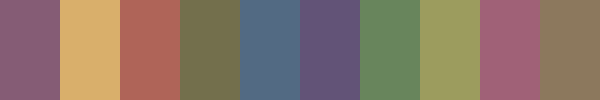

In [5]:
color_scheme = palettable.cartocolors.qualitative.Antique_10
colors = (np.array(color_scheme.mpl_colors) * 255).astype(int)
colors = np.hstack([colors, np.full((colors.shape[0], 1), 255)])
color_scheme.show_discrete_image()

In [6]:
bb = BoilerplateBuilder()

In [7]:
# Load the components_by_file json for validation
with open(f"{python_dir_from_nb_dir}/components_by_file.json") as f:
    components_by_file = json.load(f)

# Main Test Scene

In [8]:
scene_key = "main_test_scene"

In [9]:
scene_data = {}

In [10]:
scene_data["player"] = {
    "PlayerFlag": {},
    "PhysicsComp": {
        "mass": 1.0,
        "pos": [0.5, 0.5],
        "vel": [1.0, 1.0],
    },
    "DragForceComp": {"power": 2.5},
    "DurabilityComp": {"delete_at_zero": False},
    "RenderFlag": {},
    "CircleComp": {"radius": 1.0, "fill_color": [255, 128, 128, 255]},
    "ZOrderComp": {"zorder": 0},
    "ViewFlag": {},
}

In [11]:
scene_data["beacon"] = {
    "PhysicsComp": {},
    "MouseButtonReleasedComp": {},
    "RenderFlag": {},
    "CircleComp": {
        "radius": 0.5,
        "outline_thickness": 0.1,
        "fill_color": [0, 0, 0, 255],
        "outline_color": [255, 255, 255, 255],
    },
    "ZOrderComp": {"zorder": 0},
}

In [12]:
scene_data["player-beacon force"] = {
    "PairComp": {"target_entity_name": "player", "source_entity_name": "beacon"},
    "PairwiseForceComp": {"magnitude": -1.0},
}

In [13]:
scene_data[f"bkgrd"] = {
    "PhysicsComp": {},
    "RenderFlag": {},
    "CircleComp": {
        "radius": 10.0,
        "outline_thickness": 0.2,
        "fill_color": [127, 127, 127, 255],
        "outline_color": [63, 63, 63, 255],
    },
    "ZOrderComp": {"zorder": -101},
}

In [14]:
# Add a scene triggered by a watch
scene_data["triggered_scene"] = {
    "SceneComp": {
        "scene_fp": f"{scene_dir_from_exec_dir}/triggered_scene.json",
    },
}
scene_data["watch"] = {
    "WatchComp": {},
}
scene_data["watch_trigger"] = {
    "WatchTriggerFlag": {},
    "PairComp": {
        "source_entity_name": "watch",
        "target_entity_name": "[SceneComp|name:triggered_scene]",
    },
}

In [ ]:
bb.save_scene_to_json(
    scene_key,
    scene_dir_from_nb_dir,
    scene_data,
    components_by_file["system_components"],
)

# Triggered Scene

In [16]:
scene_key = "triggered_scene"

In [17]:
scene_data = {}

In [18]:
scene_data["projectile"] = {
    "PhysicsComp": {},
    "DragForceComp": {},
    "DurabilityComp": {},
    "RenderFlag": {},
    "CircleComp": {
        "radius": 0.5,
        "fill_color": colors[4].tolist(),
    },
    "ZOrderComp": {"zorder": -101},
}

In [19]:
scene_data["projectile-player sync"] = {
    "PairComp": {
        "target_entity_name": "projectile",
        "source_entity_name": "[PlayerFlag|first]",
    },
    "SyncPositionComp": {
        "once_only": True,
    },
}

In [20]:
bb.save_scene_to_json(
    scene_key,
    scene_dir_from_nb_dir,
    scene_data,
    components_by_file["system_components"],
)

# Collision

In [21]:
scene_key = "test_collision"

In [22]:
scene_data = {}

In [23]:
scene_data["entity1"] = {
    "PhysicsComp": {
        "pos": [-0.5, 0.0],
        "vel": [1.0, 0.0],
    },
    "DurabilityComp": {"max_durability": 2.0},
    "RenderFlag": {},
    "CircleComp": {
        "fill_color": colors[0].tolist(),
    },
}

In [24]:
scene_data["entity2"] = {
    "PhysicsComp": {
        "pos": [0.5, 0.0],
        "vel": [-1.0, 0.0],
    },
    "DurabilityComp": {"max_durability": 1.0},
    "RenderFlag": {},
    "CircleComp": {
        "fill_color": colors[1].tolist(),
    },
    "DebugComp": {},
}

In [25]:
scene_data["collision12"] = {
    "PairComp": {
        "source_entity_name": "entity1",
        "target_entity_name": "entity2",
    },
    "CollisionComp": {},
}

In [26]:
bb.save_scene_to_json(
    scene_key,
    scene_dir_from_nb_dir,
    scene_data,
    components_by_file["system_components"],
)

# Menu

In [27]:
scene_key = "test_menu"

In [28]:
scene_data = {}

In [29]:
scene_data["banner"] = {
    "TextComp": {"string": "Test Menu"},
}

In [30]:
scene_data["y-axis"] = {
    "UIRenderFlag": {},
    "RectangleComp": {
        "pos": [-0.25, -50.0],
        "size": [0.5, 100.0],
        "fill_color": [255, 255, 255, 127],
    },
    "ZOrderComp": {"zorder": 0},
}

In [31]:
bb.save_scene_to_json(
    scene_key,
    scene_dir_from_nb_dir,
    scene_data,
    components_by_file["system_components"],
)